---
# **Introduction to Machine Learning**

# **Chapter 1.3 Overfitting problem and regularization**
---

## Import libraries

In [1]:
import numpy as np                  # for scientific computing (e.g. culclations with array)
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for visualization
import seaborn as sns               # for visualization

## Dataset loading

In [2]:
#Download dataset from Github
!wget https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/ice_cream_sales.csv

df_icecream = pd.read_csv("ice_cream_sales.csv")    # making data frame object from csv file
display(df_icecream)

--2023-08-08 05:52:04--  https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/ice_cream_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73 [text/plain]
Saving to: ‘ice_cream_sales.csv’

ice_cream_sales.csv 100%[===================>]      73  --.-KB/s    in 0s      

2023-08-08 05:52:05 (5.77 MB/s) - ‘ice_cream_sales.csv’ saved [73/73]



,temperature,ice cream sales
0,5,12
1,25,143
2,12,56
3,-3,15
4,31,235
5,19,153


## Standardization and extention to polynomial

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Standardization
scaler = StandardScaler()
scaler.fit(df_icecream[["temperature"]])
std_X = scaler.transform(df_icecream[["temperature"]])  # standardization for the input

# Extention to polynomial
poly_degree = 5
pf = PolynomialFeatures(degree=poly_degree, include_bias=False)
pf.fit(std_X)
X = pf.transform(std_X)                             # Note: fit_transform() provides numpy array
t = df_icecream[["ice cream sales"]].to_numpy()     # Note: convert into numpy array

display(X)
display(t)

array([[-8.49030729e-01,  7.20853179e-01, -6.12026500e-01,
         5.19629305e-01, -4.41181248e-01],
       [ 8.77811432e-01,  7.70552910e-01,  6.76400153e-01,
         5.93751786e-01,  5.21202106e-01],
       [-2.44635973e-01,  5.98467592e-02, -1.46406701e-02,
         3.58163458e-03, -8.76196660e-04],
       [-1.53976759e+00,  2.37088424e+00, -3.65061072e+00,
         5.62109208e+00, -8.65517543e+00],
       [ 1.39586408e+00,  1.94843653e+00,  2.71975256e+00,
         3.79640491e+00,  5.29926524e+00],
       [ 3.59758783e-01,  1.29426382e-01,  4.65622778e-02,
         1.67511884e-02,  6.02638717e-03]])

array([[ 12],
       [143],
       [ 56],
       [ 15],
       [235],
       [153]])

## Run regression using Ridge and Lasso regression

a = [0.         0.         0.         0.         9.05131124]
b = [107.26741299]
R^2 = 0.4827437920703259
RMSE = 89.52225069097301


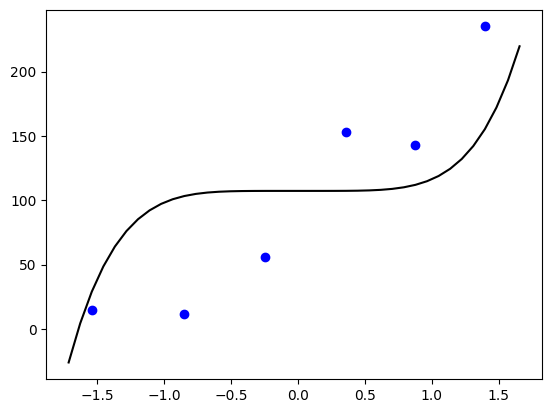

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge      # Ridge regression model
from sklearn.linear_model import Lasso      # Lasso regression model

# Model definition (Choose one of the models below)
#model = LinearRegression(fit_intercept = True)      # model definition (using y = a0*x + a1*x^2 + b)
#model = Ridge(alpha = 0.5, fit_intercept = True)    # model definition
model = Lasso(alpha = 100.0, fit_intercept = True)    # model definition

# Optimizaing the parameters
# Note: X and t are numpy array. Not pandas DataFrame objects
model.fit(X, t)                                     # fit() can accept both numpy array and pandas DataFrame
y = model.predict(X)
R2 = model.score(X, t)
rmse = np.sqrt(np.average((t-y)**2))

print("a =", model.coef_)
print("b =", model.intercept_)
print("R^2 =", R2)
print("RMSE =", rmse)

# Drawing the regression line
np_X0 = np.arange(-5, 35, 1).reshape(-1,1)                  # [-5, -4, -3, ... ,34]
df_X0 = pd.DataFrame(data = np_X0, columns=["temperature"]) # convert into pandas DataFrame
std_X0 = scaler.transform(df_X0)        # standardization
X0 = pf.transform(std_X0)               # expand temperature to polynomial
y0 = model.predict(X0)

plt.scatter(X[:,0], t, c="blue")        # X[:,0] means the first column of X
plt.plot(X0[:,0], y0, c="black")     # X0[:,0] means the first column of X0
plt.show()

## Loading "GDP per capita in Finland" dataset

--2023-08-08 05:52:23--  https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/gdp_per_capita_finland.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1157 (1.1K) [text/plain]
Saving to: ‘gdp_per_capita_finland.csv’

gdp_per_capita_finl 100%[===================>]   1.13K  --.-KB/s    in 0s      

2023-08-08 05:52:23 (50.3 MB/s) - ‘gdp_per_capita_finland.csv’ saved [1157/1157]



,year,GDP per capita (USD)
0,1960,1179.353011
1,1961,1327.427224
2,1962,1411.702398
3,1963,1522.319242
4,1964,1707.503938
...,...,...
58,2018,49987.626160
59,2019,48629.858230
60,2020,49169.719340
61,2021,53489.752020


<Axes: xlabel='year'>

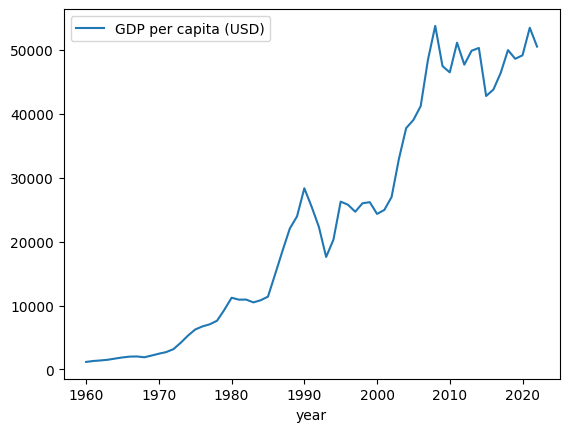

In [5]:
# Download dataset from Github
!wget https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/gdp_per_capita_finland.csv

df_gdp = pd.read_csv("gdp_per_capita_finland.csv")
display(df_gdp)
df_gdp.plot(x="year", y="GDP per capita (USD)", kind="line")

## Preprosessing :dataset separation, standardization and extention to polynomials

mean =  [1990.56818182]
std =  [19.05661151]


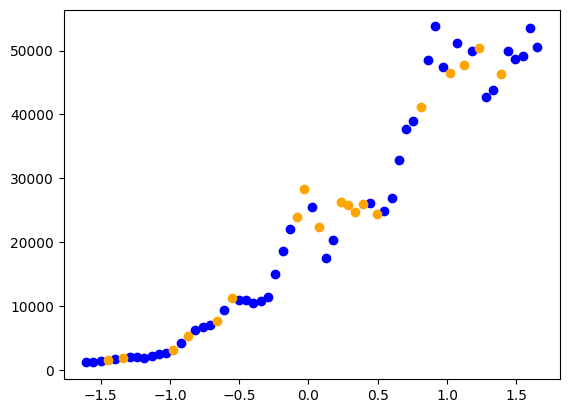

X_train.shape = (44, 4)
t_train.shape = (44, 1)
X_test.shape = (19, 4)
t_test.shape = (19, 1)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset separation
X = df_gdp[["year"]]
t = df_gdp[["GDP per capita (USD)"]]
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=47)

# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
std_X_train = scaler.transform(X_train)
std_X_test = scaler.transform(X_test)

print("mean = ", scaler.mean_)
print("std = ", np.sqrt(scaler.var_))

plt.scatter(std_X_train, t_train, c="blue")
plt.scatter(std_X_test, t_test, c="orange")
plt.show()

# Extention to polynomials
poly_degree = 4
pf = PolynomialFeatures(degree=poly_degree, include_bias=False)
pf.fit(std_X_train)
X_train = pf.transform(std_X_train)   # pf.transform returns numpy array
X_test = pf.transform(std_X_test)     # pf.transform returns numpy array

t_train = t_train.to_numpy()
t_test = t_test.to_numpy()

print("X_train.shape =", X_train.shape)
print("t_train.shape =", t_train.shape)
print("X_test.shape =", X_test.shape)
print("t_test.shape =", t_test.shape)

W = [[23133.85071275  7121.64644497 -2956.22672247 -1848.70102449]]
b = [19094.45586299]
R^2_train = 0.9616473515107331
R^2_test = 0.9478320471485424
RMSE(train) = 3681.8103652581103
RMSE(test) = 3630.5337107225873


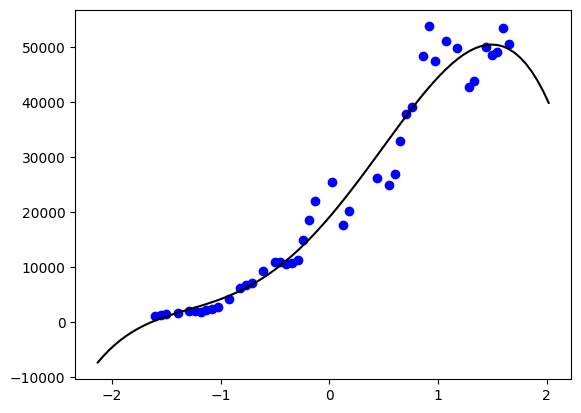

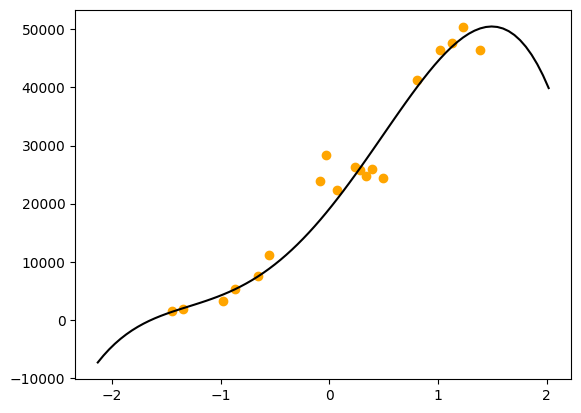

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Model definition (Choose one of the models below)
model = LinearRegression(fit_intercept = True)      # model definition (using y = a0*x + a1*x^2 + b)
#model = Ridge(alpha = 10, fit_intercept = True)    # model definition
#model = Lasso(alpha = 10, fit_intercept = True)    # model definition

# Parameter optimization and prediction
model.fit(X_train, t_train)
y_train = model.predict(X_train)
y_test = model.predict(X_test)

# Evaluation of the model
R2_train =  model.score(X_train, t_train)
R2_test =  model.score(X_test, t_test)
rmse_train = np.sqrt(np.average((t_train - y_train)**2))
rmse_test = np.sqrt(np.average((t_test - y_test)**2))

print("W =", model.coef_)
print("b =", model.intercept_)
print("R^2_train =", R2_train)
print("R^2_test =", R2_test)
print("RMSE(train) =", rmse_train)
print("RMSE(test) =", rmse_test)


# Drawing the regression line
np_X0 = np.arange(1950, 2030, 1)                        # [1950, 1951, ... , 2029]
df_X0 = pd.DataFrame(data = np_X0, columns=["year"])    # Convert into pandas DatFrame
std_X0 = scaler.transform(df_X0[["year"]])              # Standardization for X0
X0 = pf.transform(std_X0)                               # extend X0 to polynomial
y0 = model.predict(X0)

plt.scatter(X_train[:,0], t_train, c="blue")    # plotting the training dataset
plt.plot(X0[:,0], y0, c="black")                # drawing the regression line
plt.show()

plt.scatter(X_test[:,0], t_test, c="orange")    # plotting the training dataset
plt.plot(X0[:,0], y0, c="black")                # drawing the regression line
plt.show()

##🤔 **Exercise 1.3**

For the "GDP per capita in Finland" dataset, improve the prediction accuracy as much as possible through model selection and hyperparameter tuning. Then, write the MSE and $R^2$ at the best accuracy as well as the model you used, the number of dimensions of the polynomial regression, and the value of the hyperparameter $\alpha$.

\\

$R^2$(train) = 0.9414525219086558

MSE(train) = 4549.019854994438

$R^2$(test) = 0.943154826374456

MSE(test) = 3789.7920027022014

Which regression model did you use?: Ridge

degree of polynomial = 2

$\alpha$ (if you used Ridge or Lasso) = 2



mean =  [1990.56818182]
std =  [19.05661151]


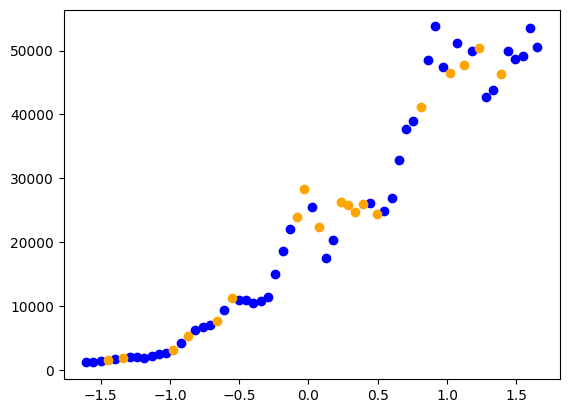

X_train.shape = (44, 2)
t_train.shape = (44, 1)
X_test.shape = (19, 2)
t_test.shape = (19, 1)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset separation
X = df_gdp[["year"]]
t = df_gdp[["GDP per capita (USD)"]]
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=47)

# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
std_X_train = scaler.transform(X_train)
std_X_test = scaler.transform(X_test)

print("mean = ", scaler.mean_)
print("std = ", np.sqrt(scaler.var_))

plt.scatter(std_X_train, t_train, c="blue")
plt.scatter(std_X_test, t_test, c="orange")
plt.show()

# Extention to polynomials
poly_degree = 2
pf = PolynomialFeatures(degree=poly_degree, include_bias=False)
pf.fit(std_X_train)
X_train = pf.transform(std_X_train)   # pf.transform returns numpy array
X_test = pf.transform(std_X_test)     # pf.transform returns numpy array

t_train = t_train.to_numpy()
t_test = t_test.to_numpy()

print("X_train.shape =", X_train.shape)
print("t_train.shape =", t_train.shape)
print("X_test.shape =", X_test.shape)
print("t_test.shape =", t_test.shape)

W = [[17175.89474056  2331.50150842]]
b = [20467.90891688]
R^2_train = 0.9414525219086558
R^2_test = 0.943154826374456
RMSE(train) = 4549.019854994438
RMSE(test) = 3789.7920027022014


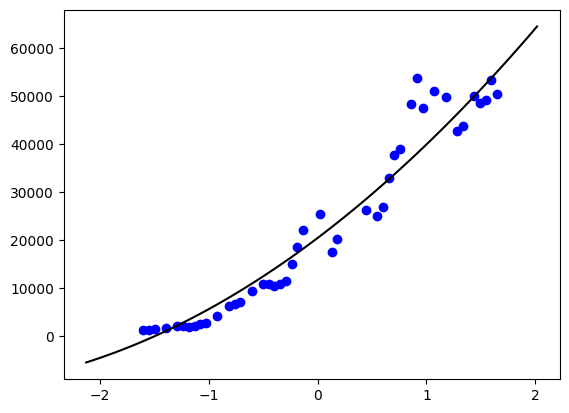

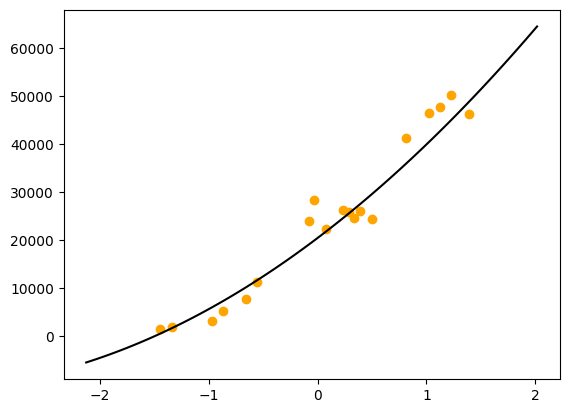

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Model definition (Choose one of the models below)
#model = LinearRegression(fit_intercept = True)      # model definition (using y = a0*x + a1*x^2 + b)
model = Ridge(alpha = 2, fit_intercept = True)    # model definition
#model = Lasso(alpha = 10, fit_intercept = True)    # model definition

# Parameter optimization and prediction
model.fit(X_train, t_train)
y_train = model.predict(X_train)
y_test = model.predict(X_test)

# Evaluation of the model
R2_train =  model.score(X_train, t_train)
R2_test =  model.score(X_test, t_test)
rmse_train = np.sqrt(np.average((t_train - y_train)**2))
rmse_test = np.sqrt(np.average((t_test - y_test)**2))

print("W =", model.coef_)
print("b =", model.intercept_)
print("R^2_train =", R2_train)
print("R^2_test =", R2_test)
print("RMSE(train) =", rmse_train)
print("RMSE(test) =", rmse_test)


# Drawing the regression line
np_X0 = np.arange(1950, 2030, 1)                        # [1950, 1951, ... , 2029]
df_X0 = pd.DataFrame(data = np_X0, columns=["year"])    # Convert into pandas DatFrame
std_X0 = scaler.transform(df_X0[["year"]])              # Standardization for X0
X0 = pf.transform(std_X0)                               # extend X0 to polynomial
y0 = model.predict(X0)

plt.scatter(X_train[:,0], t_train, c="blue")    # plotting the training dataset
plt.plot(X0[:,0], y0, c="black")                # drawing the regression line
plt.show()

plt.scatter(X_test[:,0], t_test, c="orange")    # plotting the training dataset
plt.plot(X0[:,0], y0, c="black")                # drawing the regression line
plt.show()
